In [1]:
from google.colab import files
uploaded = files.upload()

Saving Meteorite_Landings.csv to Meteorite_Landings.csv


In [57]:
import pandas as pd
df = pd.read_csv("Meteorite_Landings.csv")
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [58]:
df.isna().sum()

,0
name,0
id,0
nametype,0
recclass,0
mass (g),131
fall,0
year,291
reclat,7315
reclong,7315
GeoLocation,7315


In [59]:
df = df[df["year"].notna()]

In [60]:
df = df[df["mass (g)"]>0]
df = df.dropna(subset=['reclat', 'reclong'])

In [61]:
df.isna().sum()

,0
name,0
id,0
nametype,0
recclass,0
mass (g),0
fall,0
year,0
reclat,0
reclong,0
GeoLocation,0


In [62]:
df['fall'].value_counts()

,count
fall,
Found,37031
Fell,1065


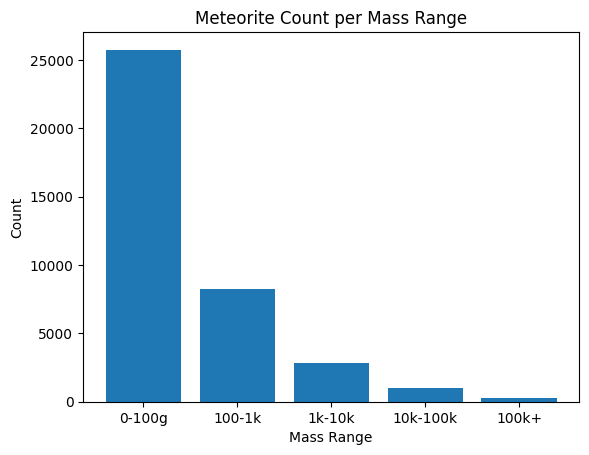

In [63]:
bins = [0, 100, 1000, 10000, 100000, df["mass (g)"].max()]
labels = ["0-100g", "100-1k", "1k-10k", "10k-100k", "100k+"]

df["mass_range"] = pd.cut(df["mass (g)"], bins=bins, labels=labels)

range_counts = df["mass_range"].value_counts().sort_index()

plt.bar(range_counts.index, range_counts.values)
plt.xlabel("Mass Range")
plt.ylabel("Count")
plt.title("Meteorite Count per Mass Range")
plt.show()

In [65]:
df["year"].head()


,year
0,1880.0
1,1951.0
2,1952.0
3,1976.0
4,1902.0


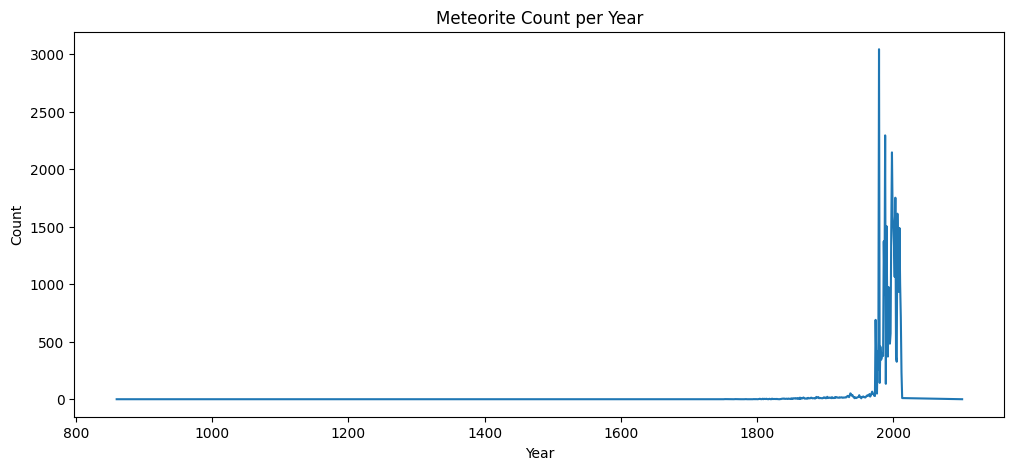

In [70]:
df["year"].value_counts().sort_index().plot(kind="line", figsize=(12,5))
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Meteorite Count per Year")
plt.show()

In [73]:
df['recclass'].value_counts().head(10)


,count
recclass,
L6,7519
H5,6243
H6,3898
H4,3880
L5,3264
LL5,2199
LL6,1660
L4,939
H4/5,395


In [84]:
from numpy import fill_diagonal
import folium
map = folium.Map(location=[20,0],zoom_start=2)

for _, row in df.sample(500).iterrows():
  folium.CircleMarker(
      [row['reclat'],row['reclong']],
      radius=2,
      color='red',
      fill=True
  ).add_to(map)

map

In [85]:
df[['mass (g)', 'reclat']].corr()

,mass (g),reclat
mass (g),1.000000,0.029289
reclat,0.029289,1.000000


In [88]:
df.groupby('fall')['mass (g)'].mean()

,mass (g)
fall,
Fell,47506.128685
Found,14691.119999


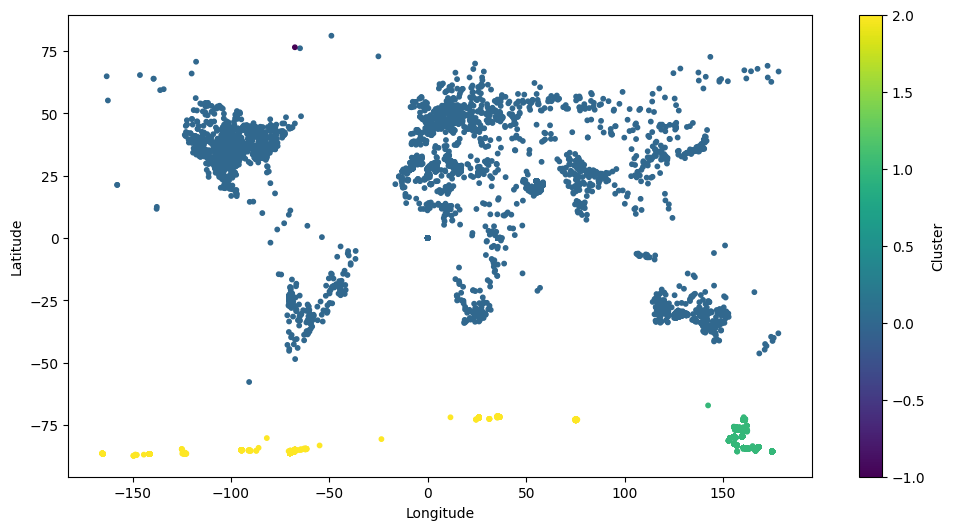

In [93]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

coords = df[['reclat', 'reclong']].dropna()

scaler = StandardScaler()
X = scaler.fit_transform(coords)

dbscan = DBSCAN(eps=0.5, min_samples=10)
labels = dbscan.fit_predict(X)

coords['cluster'] = labels

plt.figure(figsize=(12,6))
plt.scatter(coords['reclong'], coords['reclat'], c=coords['cluster'], s=10, cmap='viridis')
plt.colorbar(label="Cluster")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
